<a href="https://colab.research.google.com/github/bay195/data/blob/main/Analisis_Algoritma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
Kelompok 6
*   Bayu Unggul Sejati (2110631170004)
*   Hengky Triyo (2110631170021)
*   Salwa Salsabila (2110631170108)
*   Rafi Albar Kurniawan (2110631170141)

Berdasarkan dataset “Mall Customer Segmentation Data”, kelompok kami akan menganalisis Algoritma Dataset Daya Beli Pelanggan




# Karakteristik Dataset





1. Dataset ini terdiri dari 200 baris dan 5 kolom.
2. Variabel-variabel yang relevan, pada dataset memiliki variabel yang beragam, seperti jenis kelamin, usia, pendapatan tahunan, dan skor pengeluaran. Variabel-variabel ini membantu dalam mengidentifikasi pola atau segmentasi pelanggan.
3. Labeling yang tidak ada, dataset ini tidak memiliki label target karena unsupervised learning tidak memerlukan label.
4. Data numerik dan kategorikal  
 Pada dataset tersebut mencakup:
 *   CustomerID: ID unik untuk setiap pelanggan (Numerik).
 *   Gender: Jenis kelamin pelanggan (Kategorikal).
 *   Age: Usia pelanggan (Numerik).
 *   Annual Income (k$): Pendapatan tahunan dalam ribuan dolar (Numerik).
 *   Spending Score (1-100): Skor belanja berdasarkan perilaku pelanggan (Numerik).   

5. Data yang terstruktur yang berarti:
 *   Setiap baris mewakili satu pelanggan. Misalnya, baris pertama adalah informasi tentang pelanggan dengan Customer ID 1.
 *   Setiap kolom mewakili atribut dari pelanggan tersebut. Misalnya, kolom Age menunjukkan usia pelanggan, Gender menunjukkan jenis kelamin, Annual Income menunjukkan pendapatan tahunan, dan Spending Score menunjukkan skor pengeluaran.
6. Tidak ada Nilai Hilang, pada dataset terlihat lengkap tanpa adanya missing values.


Algoritma yang cocok untuk menangani masalah tersebut adalah
1. K-Means
2. K-Medoids
3. Hierarchical Clustering


# Import libraries dan Explore data

In [ ]:
#Menginstal Scikit-Learn-Extra
!pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00


Perintah !pip install scikit-learn-extra adalah perintah yang digunakan untuk menginstal pustaka (library) Python bernama scikit-learn-extra menggunakan pip, yaitu alat manajemen paket untuk Python.

In [ ]:
# Import libraries yang diperlukan
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.spatial.distance import hamming
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed, IntSlider
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import ipywidgets as widgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


fungsi dari import di atas

1. StandardScaler: Alat untuk menstandarisasi fitur dengan menghapus mean dan menskalakan ke unit variansi, menghasilkan mean 0 dan variansi 1.

2. MinMaxScaler: Alat untuk menskalakan fitur ke dalam rentang tertentu, biasanya antara 0 dan 1, dengan memetakan nilai minimum dan maksimum ke batas bawah dan atas yang ditentukan.

3. RobustScaler: Alat untuk menskalakan fitur menggunakan statistik yang tahan terhadap outlier, seperti median dan interquartile range, memastikan skala yang stabil meskipun terdapat outlier.

4. KMedoids: Algoritma clustering yang mempartisi data menjadi cluster berdasarkan medoids, yang merupakan titik data aktual dalam dataset, lebih robust terhadap outlier dibandingkan K-Means.

5. LabelEncoder: Alat untuk mengonversi label kategori non-numerik menjadi nilai numerik, memfasilitasi pemrosesan lebih lanjut oleh algoritma pembelajaran mesin.

6. pdist: Fungsi untuk menghitung jarak sepasang antara titik-titik dalam array, menghasilkan vektor jarak yang berisi semua jarak sepasang.

7. squareform: Fungsi untuk mengonversi vektor jarak hasil dari `pdist` menjadi matriks jarak persegi yang lebih mudah dibaca.

8. hamming: Fungsi untuk menghitung jarak Hamming antara dua vektor biner, mengukur proporsi posisi yang berbeda.

9. dendrogram: Alat untuk membuat diagram dendrogram yang memvisualisasikan hasil clustering hierarki, menunjukkan hubungan hierarkis antara objek dalam cluster.

10. linkage: Fungsi untuk melakukan clustering hierarki/agglomeratif, menggabungkan data berdasarkan kriteria jarak terdekat untuk membentuk struktur hierarki.

11. fcluster: Fungsi untuk membentuk cluster datar dari hasil clustering hierarki/agglomeratif berdasarkan kriteria potong tertentu pada dendrogram.

12. KMeans: Algoritma clustering yang mempartisi data ke dalam K cluster berdasarkan centroid, meminimalkan jarak kuadrat total antara titik data dan centroid terdekat.

13. Axes3D: Modul untuk membuat dan memanipulasi plot tiga dimensi dalam Matplotlib, memungkinkan visualisasi data dalam ruang 3D.

14. interact: Fungsi untuk membuat widget interaktif di Jupyter Notebook yang mengontrol input dan memperbarui output secara dinamis berdasarkan perubahan input pengguna.

15. fixed: Fungsi untuk membuat widget dengan nilai tetap, yang tidak berubah selama interaksi.

16. IntSlider: Widget slider untuk memilih nilai integer dalam rentang tertentu, digunakan dalam Jupyter Notebook untuk input interaktif.

17. AgglomerativeClustering: Algoritma clustering hierarki/agglomeratif yang menggabungkan data berdasarkan jarak terdekat, membentuk cluster secara hierarkis dari bawah ke atas.

18. silhouette_score: Alat untuk mengukur kualitas clustering berdasarkan koefisien siluet, yang mengkuantifikasi seberapa mirip objek dalam cluster dibandingkan dengan objek di cluster lain.

19. pandas (pd): Pustaka untuk manipulasi dan analisis data berbasis tabel, menyediakan struktur data DataFrame yang kuat dan fungsionalitas analisis yang ekstensif.

20. numpy (np): Pustaka untuk operasi numerik dan manipulasi array, menyediakan dukungan untuk array multidimensi dan berbagai operasi matematika tingkat tinggi.

21. matplotlib.pyplot (plt): Pustaka untuk visualisasi data, menyediakan antarmuka untuk membuat berbagai jenis plot dan visualisasi grafis.

22. seaborn (sns): Pustaka untuk visualisasi data statistik, yang dibangun di atas Matplotlib dan menyediakan tema grafis yang lebih menarik dan alat analisis statistik tambahan.

Impor ini berfungsi untuk preprocessing data, penerapan algoritma clustering, evaluasi clustering, serta visualisasi data dalam analisis data menggunakan Python.

In [ ]:
url = 'https://raw.githubusercontent.com/bay195/data/main/Mall_Customers.csv'

# Membaca data ke dalam dataframe
df = pd.read_csv(url)

url: Variabel yang menyimpan alamat URL dari file CSV yang akan diunduh. URL ini mengarahkan ke file data pelanggan mall yang disimpan secara online.

pd.read_csv(url): Fungsi dari pustaka pandas yang digunakan untuk membaca file CSV dari URL yang diberikan. Fungsi ini mengunduh data dari URL dan membacanya ke dalam format.

DataFrame (df): Struktur data dua dimensi dari pustaka pandas yang menyimpan data dalam bentuk tabel dengan label baris dan kolom. Hasil pembacaan file CSV disimpan dalam variabel df.

Secara keseluruhan, kode ini mengunduh data pelanggan mall dari URL yang diberikan dan memuatnya ke dalam DataFrame pandas untuk keperluan analisis data.

In [ ]:
# Menampilkan ukuran dan dimensi dataset
print("Ukuran dataset:", df.shape)

Ukuran dataset: (200, 5)


df.shape:
Atribut dari DataFrame pandas yang mengembalikan ukuran dan dimensi dataset sebagai tuple yang berisi jumlah baris dan kolom.

print("Ukuran dataset:", df.shape):
Fungsi print yang digunakan untuk menampilkan teks "Ukuran dataset:" diikuti oleh nilai dari df.shape (jumlah baris dan kolom dalam DataFrame) ke layar.
Secara keseluruhan, kode ini digunakan untuk menampilkan ukuran dan dimensi dataset dalam DataFrame df, yaitu jumlah baris dan kolomnya.

In [ ]:
# Melihat tipe data untuk setiap kolom
print("\nTipe data:")
print(df.dtypes)


Tipe data:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


print("\nTipe data:"):
Fungsi print digunakan untuk menampilkan teks "\nTipe data:" ke layar. Karakter "\n" adalah newline character yang menyebabkan teks "Tipe data:" muncul di baris baru.

print(df.dtypes):
Fungsi print digunakan untuk menampilkan tipe data dari setiap kolom dalam DataFrame df ke layar.
df.dtypes: Atribut dari DataFrame pandas yang mengembalikan tipe data (dtype) dari setiap kolom dalam DataFrame df. Hasilnya adalah Series pandas dengan indeks sebagai nama kolom dan nilai sebagai tipe data masing-masing kolom.
Secara keseluruhan, kode ini digunakan untuk menampilkan tipe data dari setiap kolom dalam DataFrame df ke layar.

In [ ]:
# Menghitung jumlah kemunculan nilai 'Male' dalam kolom 'Gender'
count_male = df['Gender'].value_counts()['Male']

# Menghitung jumlah kemunculan nilai 'Female' dalam kolom 'Gender'
count_female = df['Gender'].value_counts()['Female']

print("Jumlah Male:", count_male)
print("Jumlah Female:", count_female)

Jumlah Male: 88
Jumlah Female: 112


Menghitung Jumlah Gender:

df['Gender'].value_counts(): Fungsi value_counts dari pandas digunakan pada kolom 'Gender' dalam DataFrame df untuk menghitung frekuensi masing-masing kategori (misalnya, 'Male' dan 'Female'). Hasilnya adalah Series pandas yang berisi jumlah kemunculan setiap kategori dalam kolom 'Gender'.

df['Gender'].value_counts()['Male']: Ekspresi ini mengakses jumlah kemunculan kategori 'Male' dalam hasil value_counts. Nilainya disimpan dalam variabel count_male.

df['Gender'].value_counts()['Female']: Ekspresi ini mengakses jumlah kemunculan kategori 'Female' dalam hasil value_counts. Nilainya disimpan dalam variabel count_female.

Menampilkan Jumlah Gender:

print("Jumlah Male:", count_male): Fungsi print digunakan untuk menampilkan teks "Jumlah Male:" diikuti oleh nilai dari count_male ke layar.

print("Jumlah Female:", count_female): Fungsi print digunakan untuk menampilkan teks "Jumlah Female:" diikuti oleh nilai dari count_female ke layar.

In [ ]:
# Definisikan fungsi untuk menghitung jarak Hamming antara dua kolom
def hamming_distance(x, y):
    return sum(x != y) / float(len(x))

# Hitung jarak Hamming untuk kolom "Gender"
hamming_dist_gender = hamming_distance(df['Gender'].values, df['Gender'].values)
print("Jarak Hamming untuk kolom 'Gender':", hamming_dist_gender)


Jarak Hamming untuk kolom 'Gender': 0.0


Fungsi hamming_distance(x, y):

Fungsi ini menerima dua parameter, x dan y, yang merupakan array atau list dari nilai-nilai yang ingin dibandingkan.
sum(x != y): Menghitung jumlah elemen yang berbeda antara x dan y.
float(len(x)): Mengonversi panjang x menjadi tipe data float untuk pembagian.
return sum(x != y) / float(len(x)): Mengembalikan jarak Hamming yang dihitung sebagai proporsi dari elemen yang berbeda dibandingkan dengan total elemen.

Menghitung Jarak Hamming:

df['Gender'].values: Mengambil nilai-nilai dari kolom 'Gender' dalam DataFrame df sebagai array numpy.
hamming_distance(df['Gender'].values, df['Gender'].values): Memanggil fungsi hamming_distance dengan dua array yang sama, yaitu nilai-nilai dari kolom 'Gender', untuk menghitung jarak Hamming.
hamming_dist_gender: Variabel yang menyimpan hasil perhitungan jarak Hamming.

Menampilkan Jarak Hamming:

print("Jarak Hamming untuk kolom 'Gender':", hamming_dist_gender): Fungsi print digunakan untuk menampilkan teks "Jarak Hamming untuk kolom 'Gender':" diikuti oleh nilai dari hamming_dist_gender ke layar.

In [ ]:
df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Gender_Binary  
0                0  
1                0  
2                1  
3                1  
4                1  
..             ...  
195              1  
196              1  
197              0  
198              0  
199              0  

[200 rows x 6 columns]

Setelah melakukan pemeriksaan dataset, kami beranggapan bahwa dataset yang kami miliki sudah sesuai. Pada kolom 'Annual Income (k$)' dalam satuan k atau bukan tidak akan mempengaruhi clustering. Hal ini karena algoritma clustering yang kami gunakan bekerja berdasarkan jarak relatif antar data poin, dan transformasi skala yang seragam akan mempertahankan jarak relatif ini.

In [ ]:
# Memeriksa missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
# Deskripsi statistik dasar untuk data numerik
print("\nDeskripsi statistik:")
print(df.describe())


Deskripsi statistik:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
# Menghitung dan menampilkan skewness untuk kolom numerik
print("\nSkewness:")
data_num = df.select_dtypes(include=[np.number])
print(data_num.skew())


Skewness:
CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


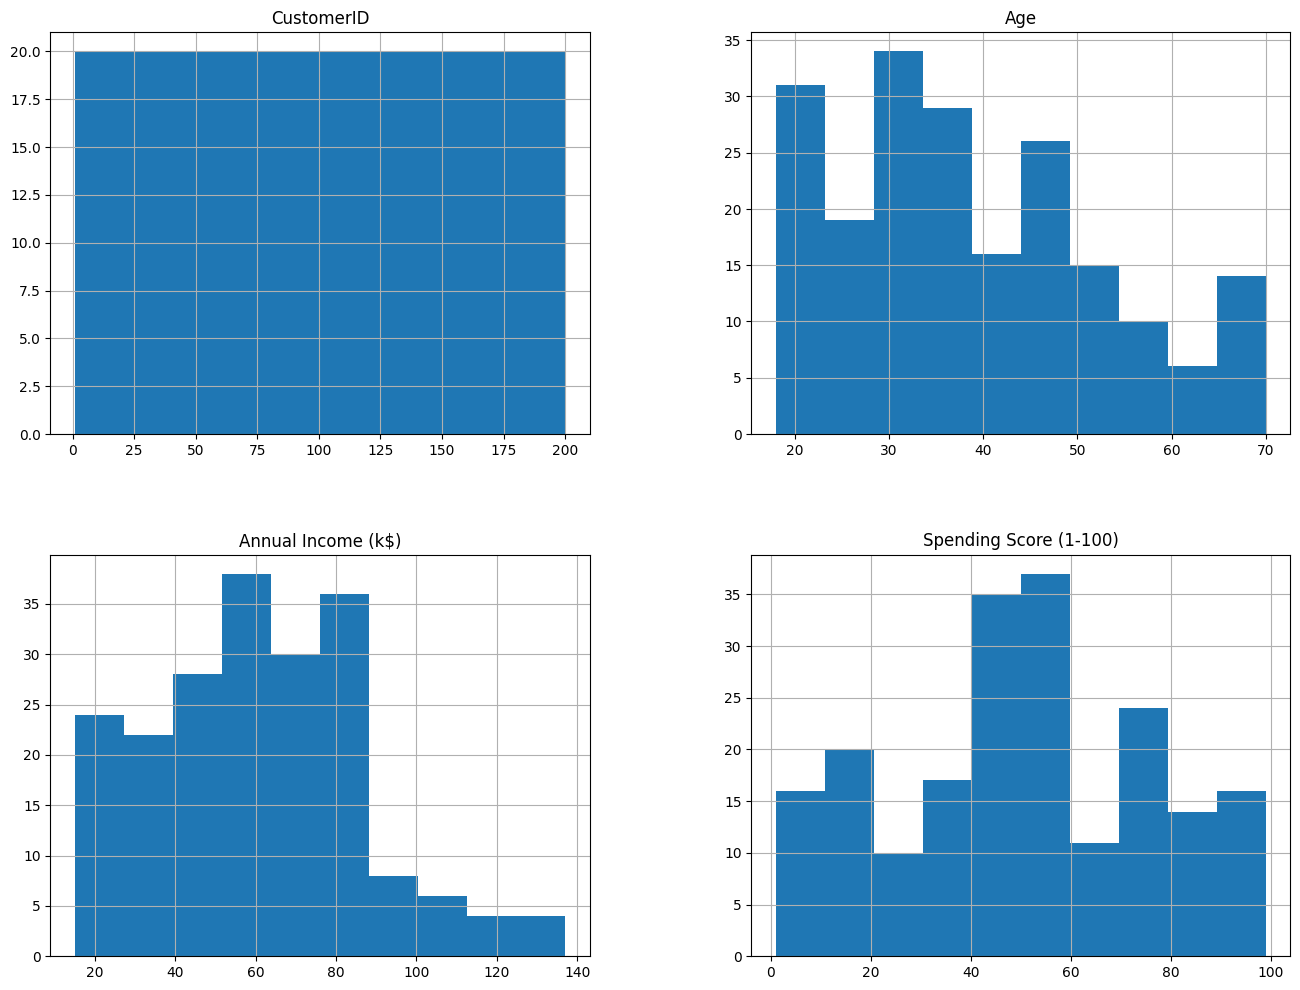

In [ ]:
# Membuat histogram untuk memeriksa distribusi data setiap kolom numerik
df.hist(figsize=(16, 12))
plt.show()

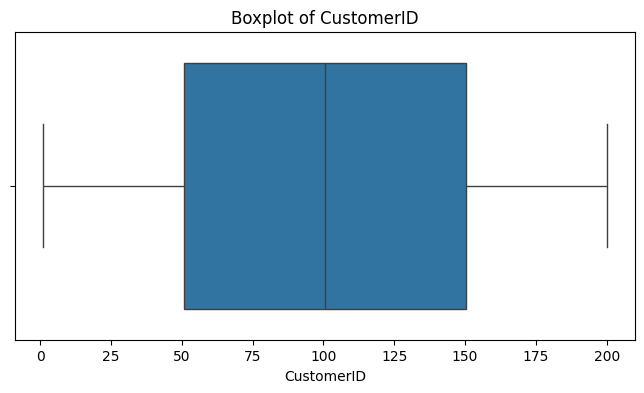

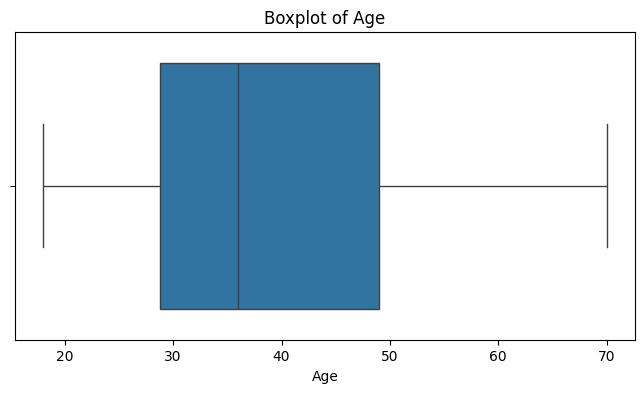

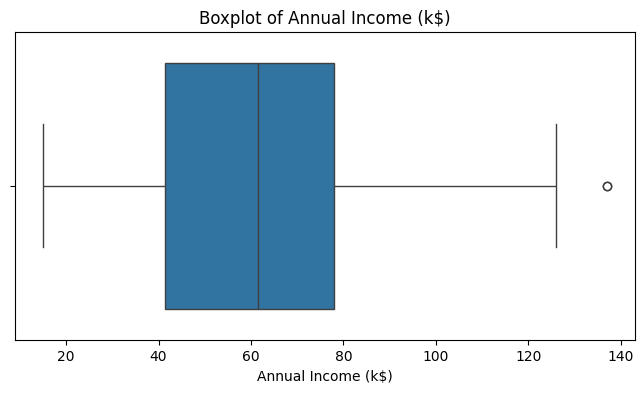

In [ ]:
# Membuat boxplot untuk menilai adanya outlier pada setiap kolom numerik
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

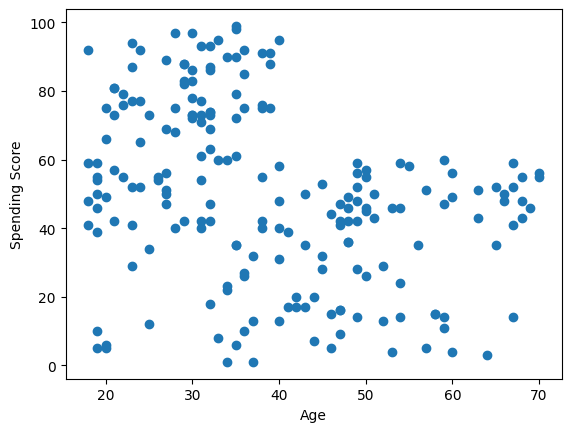

In [ ]:
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Preprocessing

In [ ]:
# Pilih fitur untuk klastering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
features = features.values

# Normalisasi fitur
features_ss = StandardScaler().fit_transform(features)
features_mm = MinMaxScaler().fit_transform(features)
features_rs = RobustScaler().fit_transform(features)

# K-Means

In [ ]:
def elbow_method(features_scaled, scaling):
    wcss = []
    k_values = range(1, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(features_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the WCSS for each k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss, 'bo-', markersize=8)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title(f'Elbow Method For Optimal k - {scaling}')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

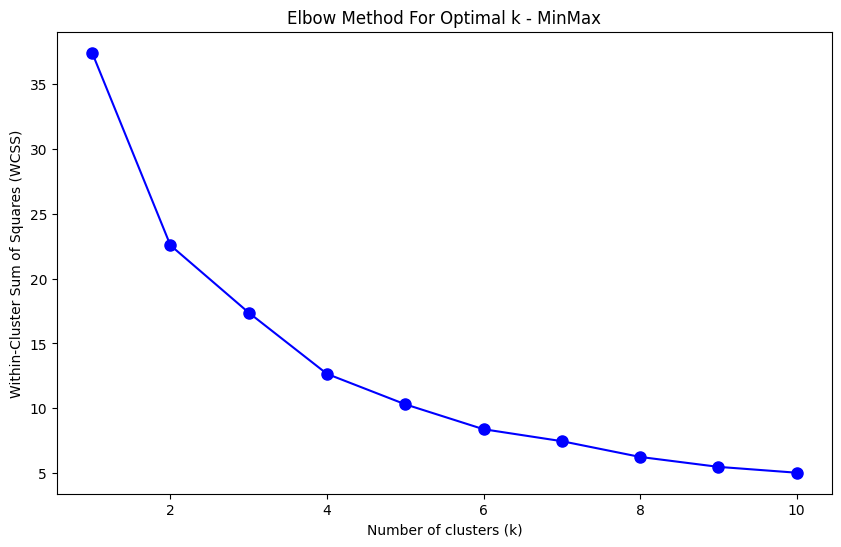

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
elbow_method(features, 'Non Scale')
elbow_method(features_ss, 'Standard')
elbow_method(features_mm, 'MinMax')
elbow_method(features_rs, 'Robust')

In [ ]:
def kmeans_clustering(features, k, name):
    # Membuat model K-Means dan fitting data
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(features)

    # Visualisasi hasil klastering
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 1], features[:, 2], c=kmeans_labels, cmap='viridis')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'K-Means Clustering ({name})')
    plt.colorbar()
    plt.show()

    def plot_3d(elev=30, azim=30):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(features[:, 1], features[:, 2], features[:, 0], c=kmeans_labels, cmap='viridis', s=50)
        ax.set_xlabel('Annual Income (k$)')
        ax.set_ylabel('Spending Score (1-100)')
        ax.set_zlabel('Age')
        ax.view_init(elev=elev, azim=azim)
        plt.title(f'3D K-Means Clustering ({name})')
        plt.show()

    # Membuat widget interaktif untuk memutar plot 3D
    interact(plot_3d, elev=IntSlider(min=-90, max=90, step=10, value=30), azim=IntSlider(min=-180, max=180, step=10, value=30))
    return kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


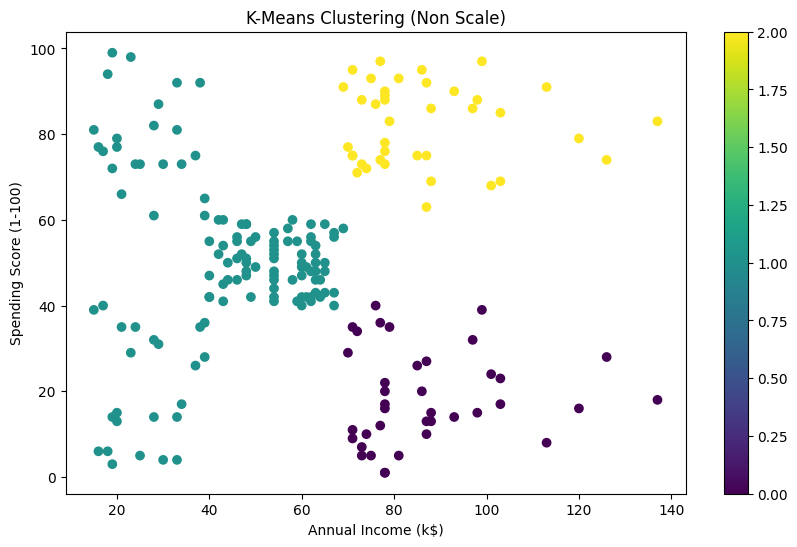

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmeans_ns = kmeans_clustering(features, 3, 'Non Scale')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


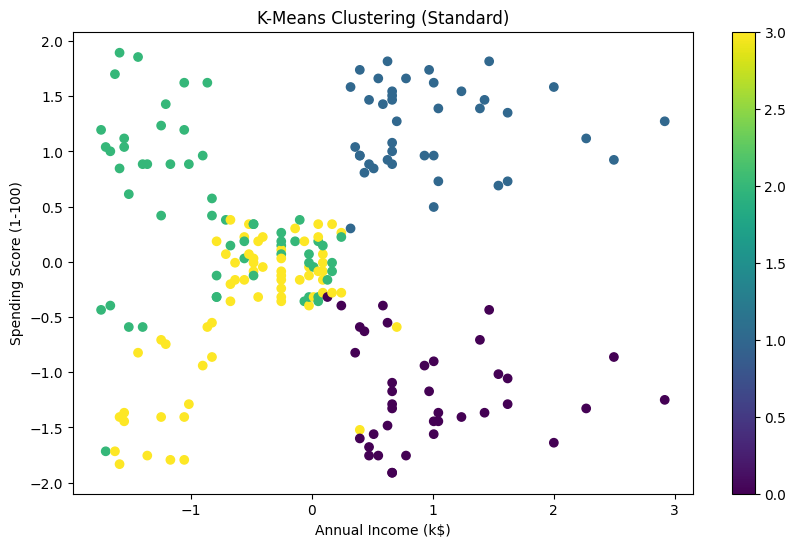

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmeans_ss = kmeans_clustering(features_ss, 4, 'Standard')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


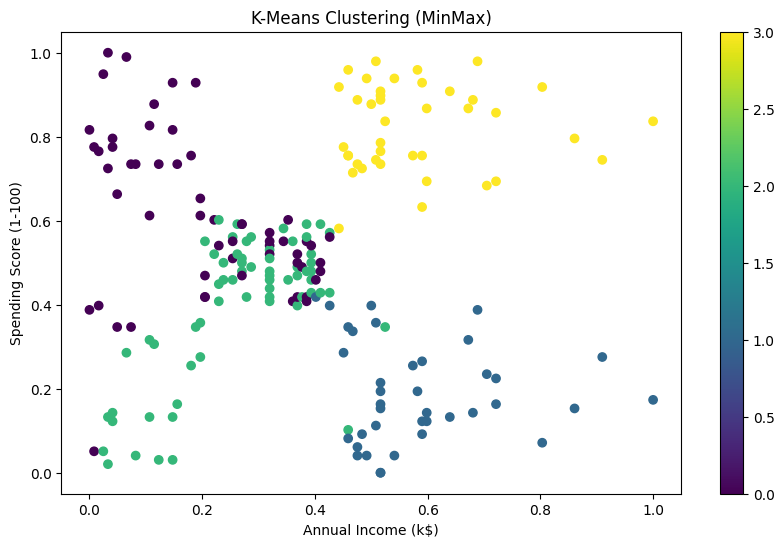

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmeans_mm = kmeans_clustering(features_mm, 4, 'MinMax')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


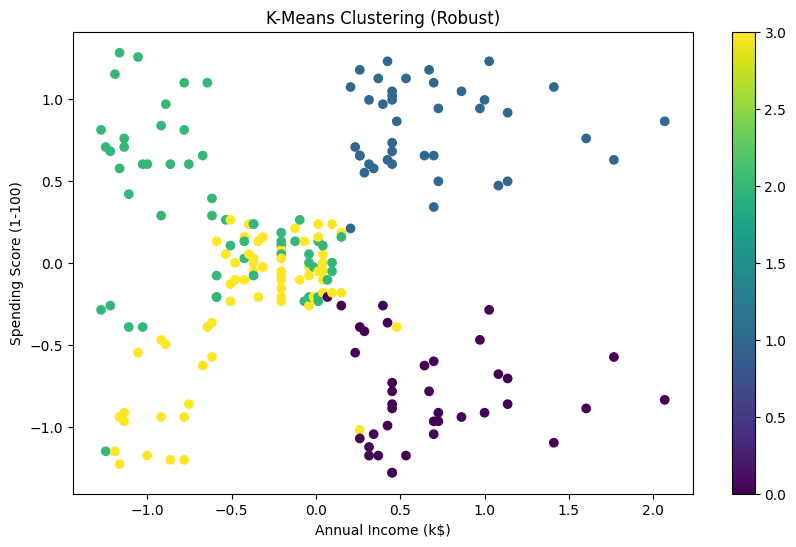

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmeans_rs = kmeans_clustering(features_rs, 4, 'Robust')

# K-Medoids

In [ ]:
def elbow_method_medo(features_scaled, scaling):
    wcss = []
    k_values = range(1, 11)
    for k in k_values:
        kmedoids = KMedoids(n_clusters=k, random_state=42)
        kmedoids.fit(features_scaled)
        wcss.append(kmedoids.inertia_)

    # Plot the WCSS for each k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, wcss, 'bo-', markersize=8)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.title(f'Elbow Method For Optimal k - {scaling}')
    plt.show()

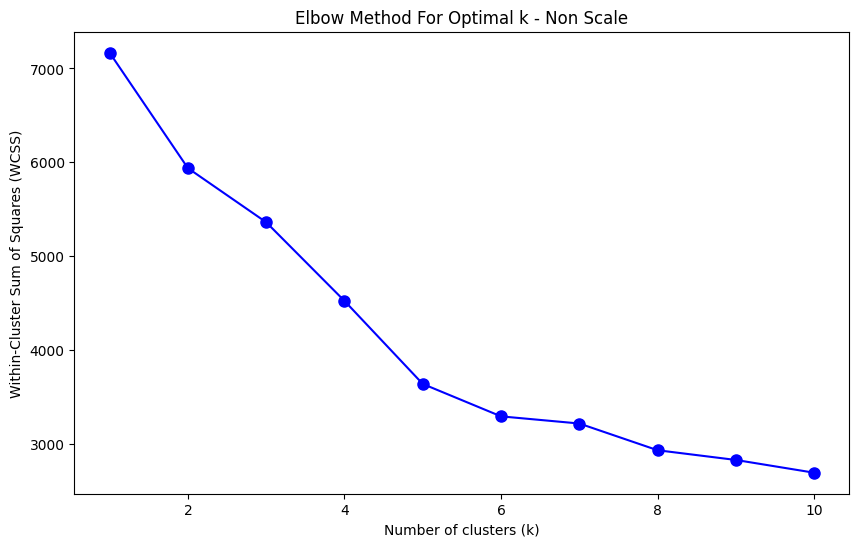

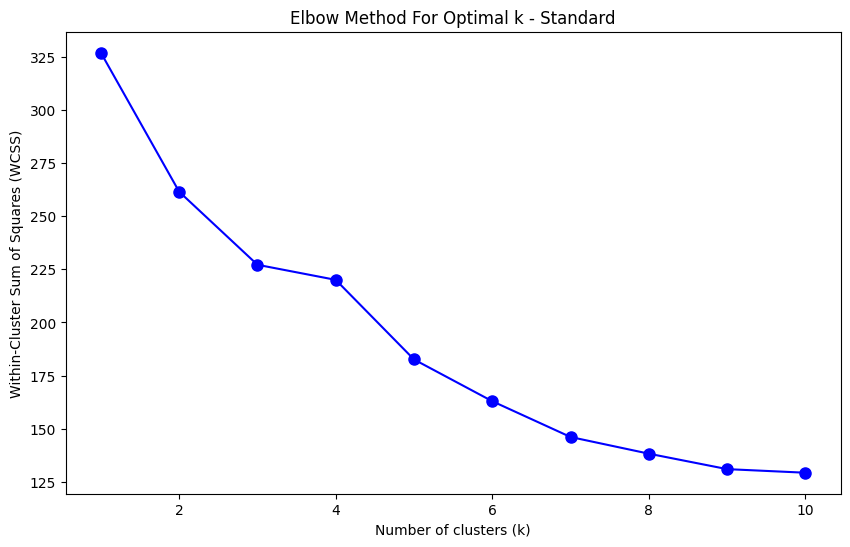

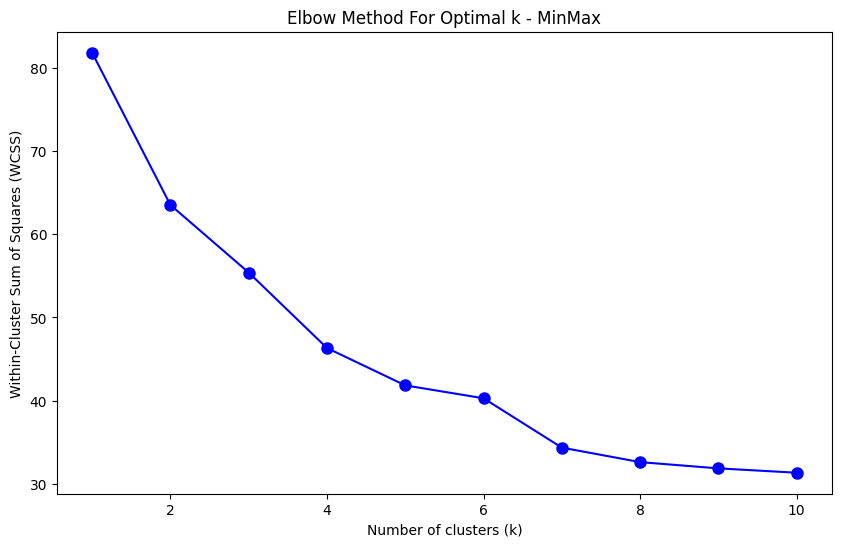

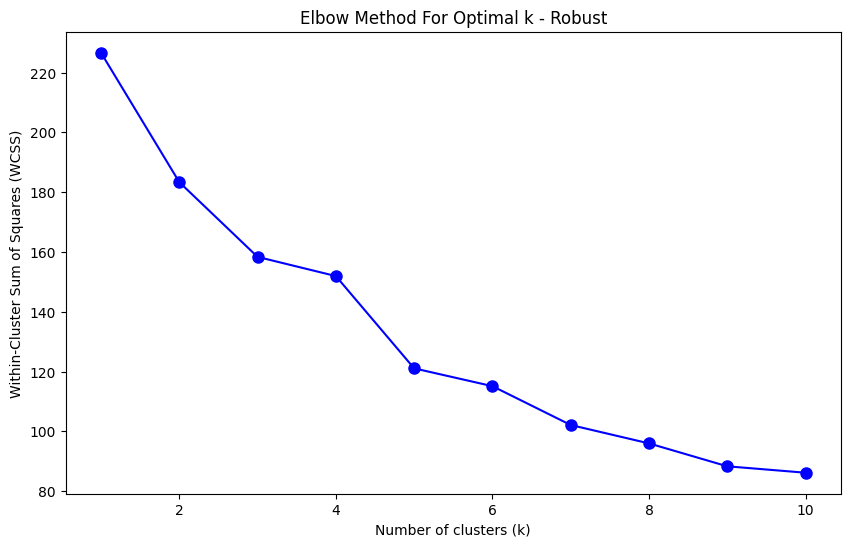

In [ ]:
elbow_method_medo(features, 'Non Scale')
elbow_method_medo(features_ss, 'Standard')
elbow_method_medo(features_mm, 'MinMax')
elbow_method_medo(features_rs, 'Robust')

In [ ]:

def kmedoids_clustering(features, k, name):
    # Membuat model K-Medoids dan fitting data
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(features)

    # Visualisasi hasil klastering
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 1], features[:, 2], c=kmedoids_labels, cmap='viridis')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'K-Medoids Clustering ({name})')
    plt.colorbar()
    plt.show()

    def plot_3d(elev=30, azim=30):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(features[:, 1], features[:, 2], features[:, 0], c=kmedoids_labels, cmap='viridis', s=50)
        ax.set_xlabel('Annual Income (k$)')
        ax.set_ylabel('Spending Score (1-100)')
        ax.set_zlabel('Age')
        ax.view_init(elev=elev, azim=azim)
        plt.title(f'3D K-Medoids Clustering ({name})')
        plt.show()

    # Membuat widget interaktif untuk memutar plot 3D
    interact(plot_3d, elev=IntSlider(min=-90, max=90, step=10, value=30), azim=IntSlider(min=-180, max=180, step=10, value=30))
    return kmedoids_labels


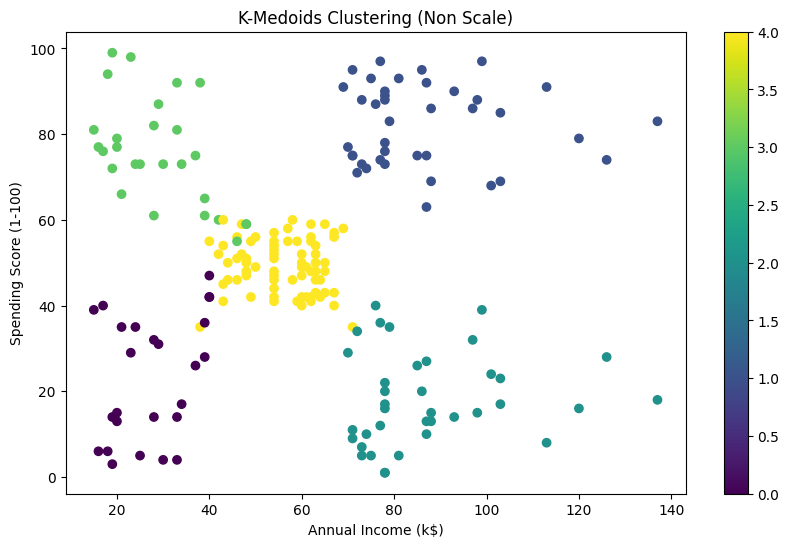

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmedoids_ns = kmedoids_clustering(features, 5, 'Non Scale')

In [ ]:
kmedoids_ss = kmedoids_clustering(features_ss, 5, 'Standard')

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

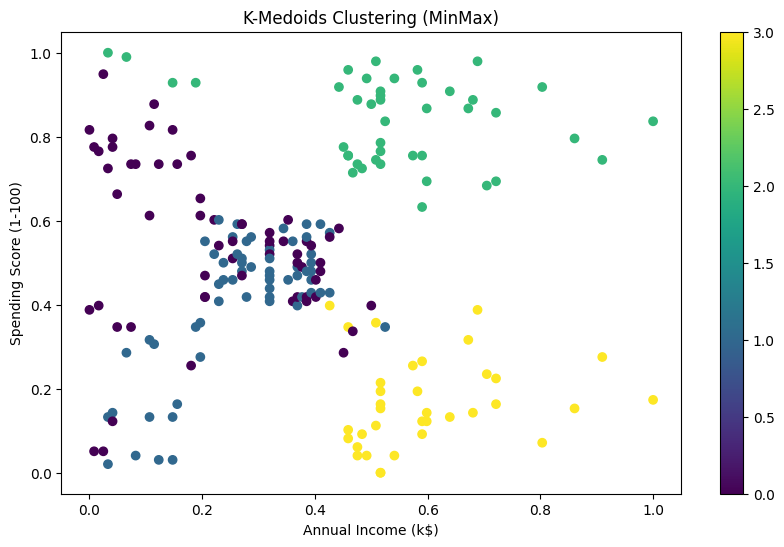

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmedoids_mm = kmedoids_clustering(features_mm, 4, 'MinMax')

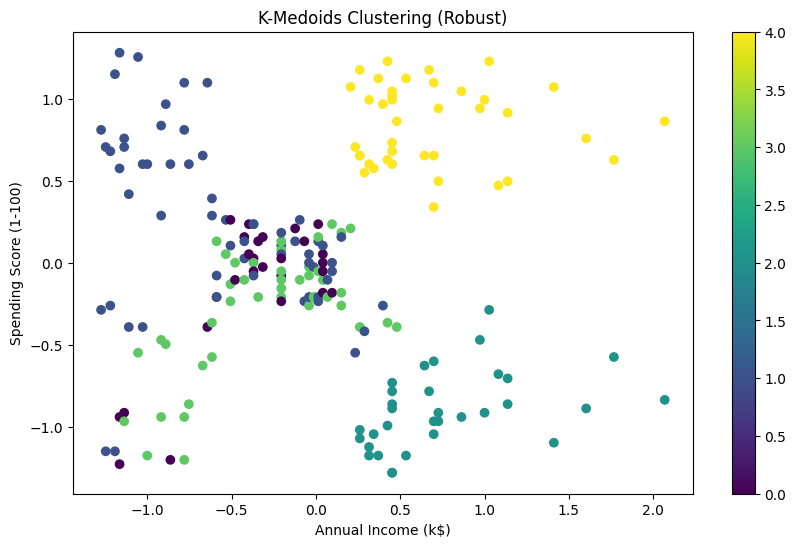

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
kmedoids_rs = kmedoids_clustering(features_rs, 5, 'Robust')

# Hierarchical Clustering

Menentukan nilai max_d terbaik dengan mencari jumlah cluster yang tepat berdasarkan silhouette score nya

In [ ]:
def best_cluster(features, name):
    # Menggunakan linkage method 'ward'
    Z = linkage(features, method='ward')

    # Plot dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title(f'Hierarchical Clustering Dendrogram - ({name})')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance')
    plt.show()

    # Menyimpan nilai silhouette untuk berbagai jumlah klaster
    silhouette_scores = []
    for n_clusters in range(2, 11):
        clustering = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = clustering.fit_predict(features)
        silhouette_avg = silhouette_score(features, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot nilai silhouette untuk berbagai jumlah klaster
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette Score for Different Number of Clusters - ({name})')
    plt.show()

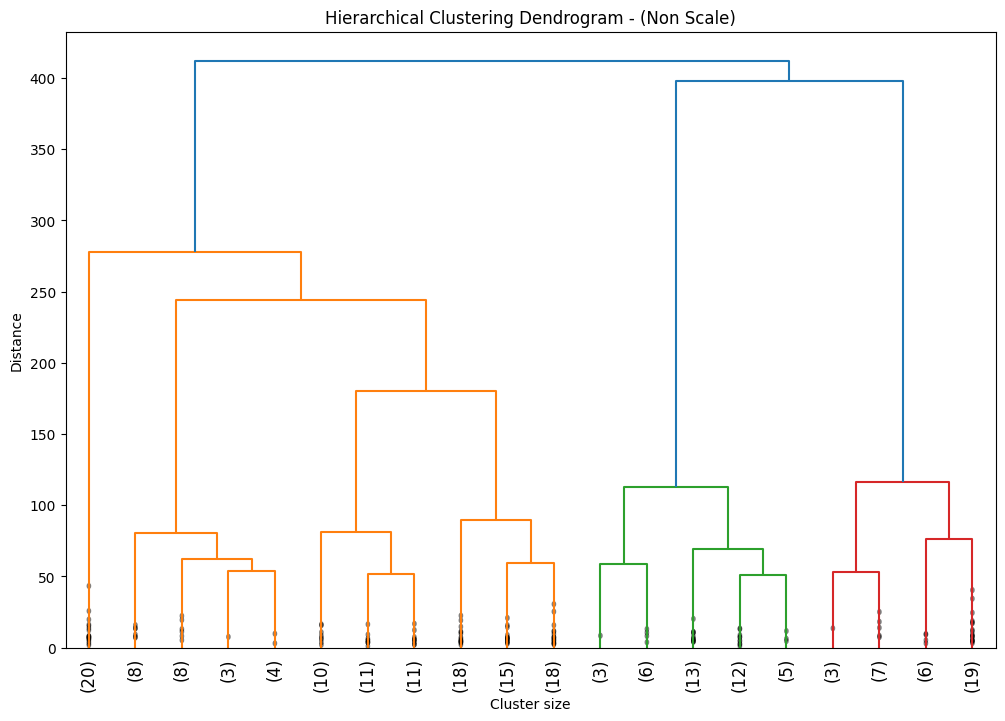

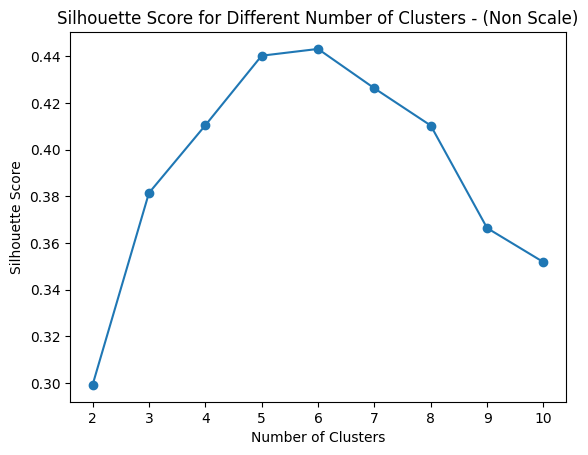

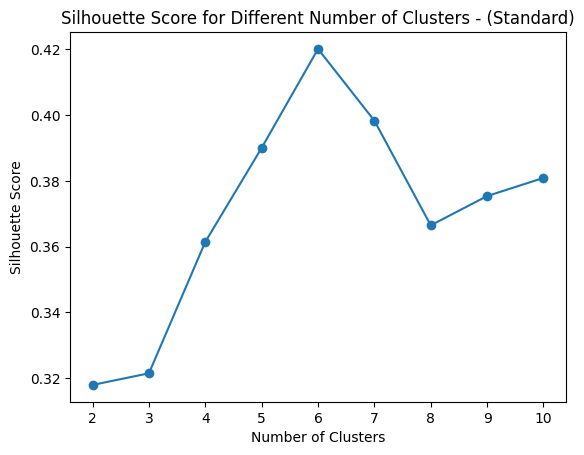

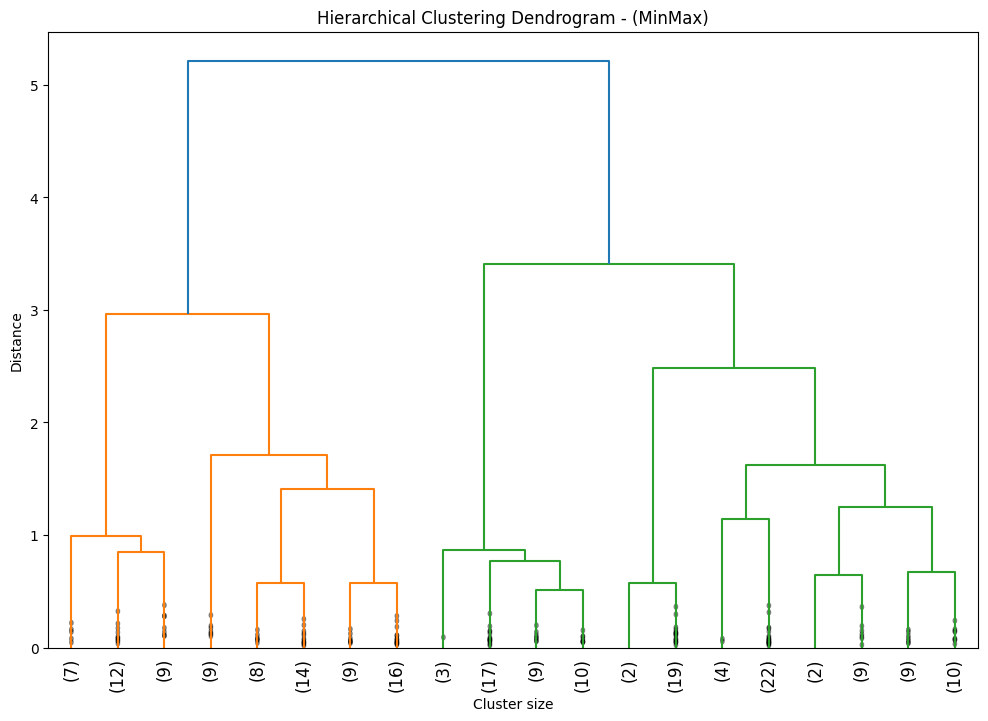

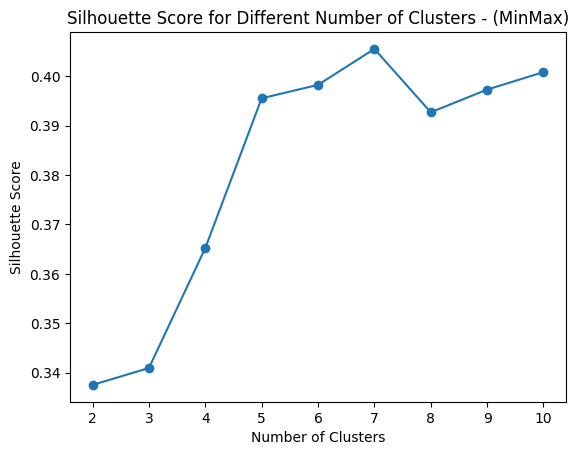

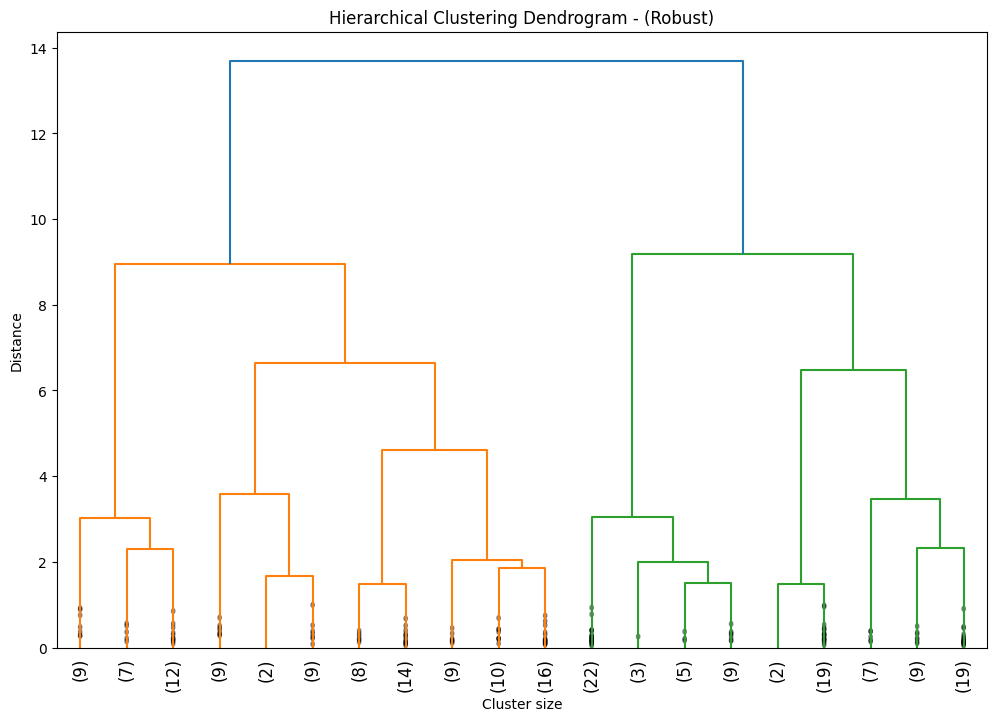

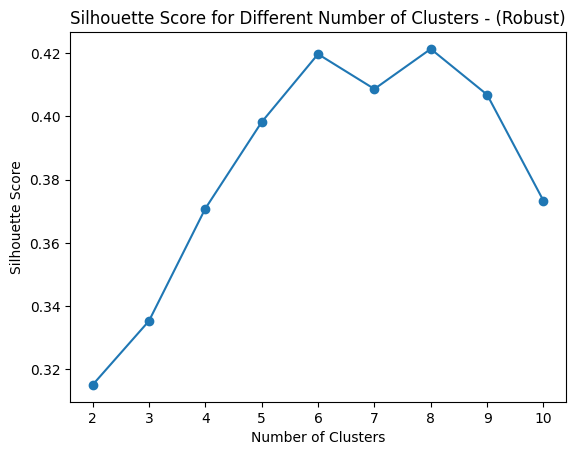

In [ ]:
best_cluster(features, 'Non Scale')
best_cluster(features_ss, 'Standard')
best_cluster(features_mm, 'MinMax')
best_cluster(features_rs, 'Robust')

In [ ]:
def hierarchical_clustering(features, max_d, name):
    # Menggunakan linkage method 'ward'
    Z = linkage(features, method='ward')

    # Membuat klaster berdasarkan threshold distance
    clusters = fcluster(Z, max_d, criterion='distance')

    # Plot 2D scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(features[:, 1], features[:, 2], c=clusters, cmap='viridis')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(f'Hierarchical Clustering Scatter Plot ({name})')
    plt.colorbar()
    plt.show()

    # Plot 3D scatter plot
    def plot_3d(elev=30, azim=30):
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(features[:, 1], features[:, 2], features[:, 0], c=clusters, cmap='viridis', s=50)
        ax.set_xlabel('Annual Income (k$)')
        ax.set_ylabel('Spending Score (1-100)')
        ax.set_zlabel('Age')
        ax.view_init(elev=elev, azim=azim)
        plt.title(f'3D Hierarchical Clustering ({name})')
        plt.show()

    # Membuat widget interaktif untuk memutar plot 3D
    interact(plot_3d, elev=IntSlider(min=-90, max=90, step=10, value=30), azim=IntSlider(min=-180, max=180, step=10, value=30))

    return clusters


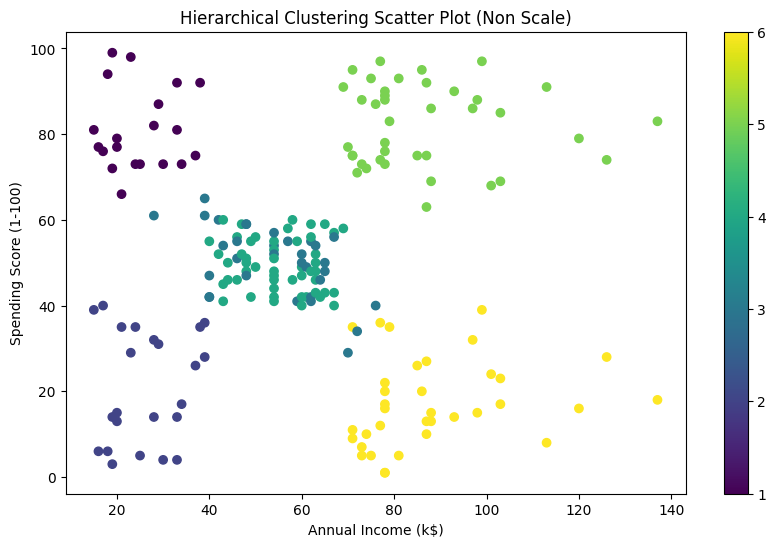

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
hier_ns = hierarchical_clustering(features, 150, 'Non Scale')

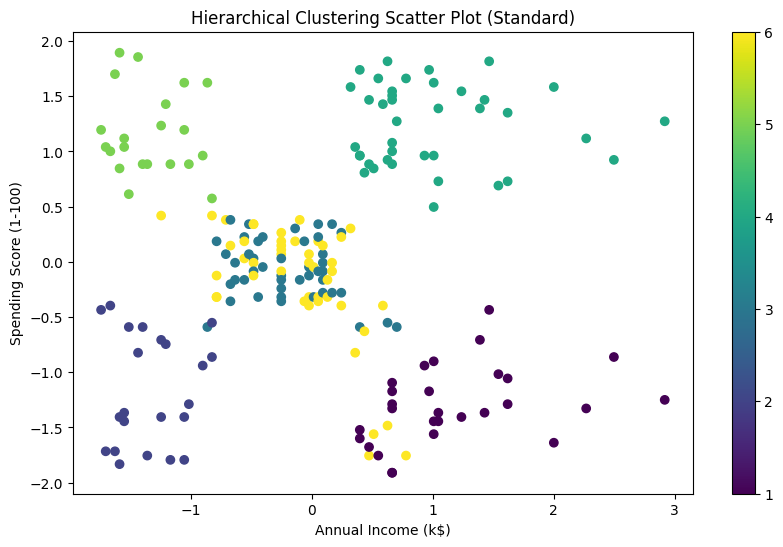

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
hier_ss = hierarchical_clustering(features_ss, 8, 'Standard')

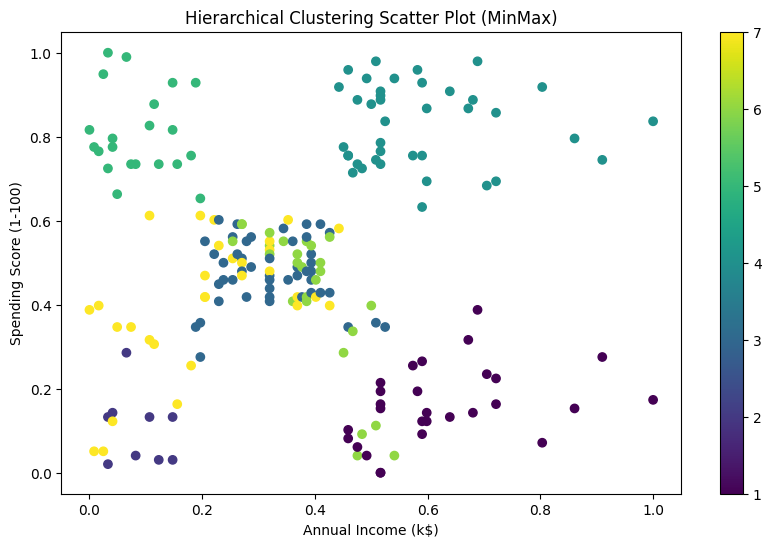

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
hier_mm = hierarchical_clustering(features_mm, 1.5, 'MinMax')

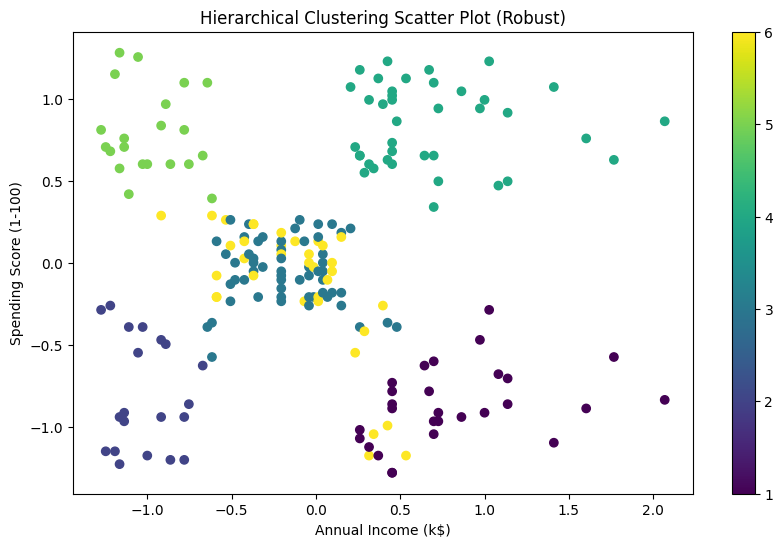

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-90, step=10), IntSlider(value=30, d…

In [ ]:
hier_rs = hierarchical_clustering(features_rs, 6, 'Robust')

# Evaluasi

In [ ]:
# Calculate Silhouette Score
kmeans_ns_score = silhouette_score(features, kmeans_ns)
kmeans_ss_score = silhouette_score(features_ss, kmeans_ss)
kmeans_mm_score = silhouette_score(features_mm, kmeans_mm)
kmeans_rs_score = silhouette_score(features_rs, kmeans_rs)

kmedoids_ns_score = silhouette_score(features, kmedoids_ns)
kmedoids_ss_score = silhouette_score(features_ss, kmedoids_ss)
kmedoids_mm_score = silhouette_score(features_mm, kmedoids_mm)
kmedoids_rs_score = silhouette_score(features_rs, kmedoids_rs)

hier_ns_score = silhouette_score(features, hier_ns)
hier_ss_score = silhouette_score(features_ss, hier_ss)
hier_mm_score = silhouette_score(features_mm, hier_mm)
hier_rs_score = silhouette_score(features_rs, hier_rs)

# Print Silhouette Scores
print("Silhouette Scores:")
print("K-Means:")
print(f"Non Scale: {kmeans_ns_score}")
print(f"Standard: {kmeans_ss_score}")
print(f"MinMax: {kmeans_mm_score}")
print(f"Robust: {kmeans_rs_score}")
print("\nK-Medoids:")
print(f"Non Scale: {kmedoids_ns_score}")
print(f"Standard: {kmedoids_ss_score}")
print(f"MinMax: {kmedoids_mm_score}")
print(f"Robust: {kmedoids_rs_score}")
print("\nHierarchical Clustering:")
print(f"Non Scale: {hier_ns_score}")
print(f"Standard: {hier_ss_score}")
print(f"MinMax: {hier_mm_score}")
print(f"Robust: {hier_rs_score}")


Silhouette Scores:
K-Means:
Non Scale: 0.3839349967742105
Standard: 0.4039582785148566
MinMax: 0.392319202055722
Robust: 0.40531024345451094

K-Medoids:
Non Scale: 0.43213619168066986
Standard: 0.35529291480082503
MinMax: 0.3813928130369843
Robust: 0.357233091444177

Hierarchical Clustering:
Non Scale: 0.44308912983504156
Standard: 0.4201169558789579
MinMax: 0.40553945327886154
Robust: 0.41973713353766234


# Kesimpulan
Berdasarkan hasil silhouette score di atas, algoritma dengan terbaik adalah Hierarchical Clustering tanpa menggunakan Scaling, ini berarti satu outlier yang terdapat di kolom Annual Income (k$) tidak begitu berpengaruh pada hasil clustering menggunakan Hierarchical Clustering